In [87]:
# Load EDA Pkgs
import pandas as pd
import numpy as np

In [88]:
# Load Data Viz Pkgs
import seaborn as sns
import matplotlib.pyplot as plt

In [89]:
# Load Text Cleaning Pkgs
import neattext.functions as nfx

In [90]:
# Load ML Pkgs
# Estimators
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB

# Transformers
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [91]:
# Load Dataset
df = pd.read_csv("/content/Text Emotions Detection.csv")
df.head()

,tweet_id,sentiment,content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...
2,1956967696,sadness,Funeral ceremony...gloomy friday...
3,1956967789,enthusiasm,wants to hang out with friends SOON!
4,1956968416,neutral,@dannycastillo We want to trade with someone w...


In [92]:
df.shape

(33333, 3)

In [93]:
df.size

99999

In [94]:
df.dtypes

tweet_id      int64
sentiment    object
content      object
dtype: object

In [95]:
df.isnull().sum()

tweet_id     0
sentiment    0
content      0
dtype: int64

In [96]:
# Value Counts
df['sentiment'].value_counts()

worry         7777
neutral       7106
sadness       4937
happiness     3718
love          2647
surprise      1797
fun           1341
hate          1235
relief        1191
empty          718
enthusiasm     598
boredom        166
anger          102
Name: sentiment, dtype: int64

<Axes: >

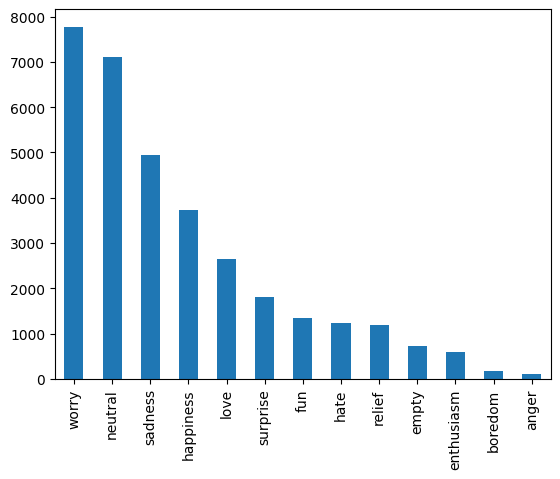

In [97]:
#value counts of sentiments
df['sentiment'].value_counts().plot(kind='bar')

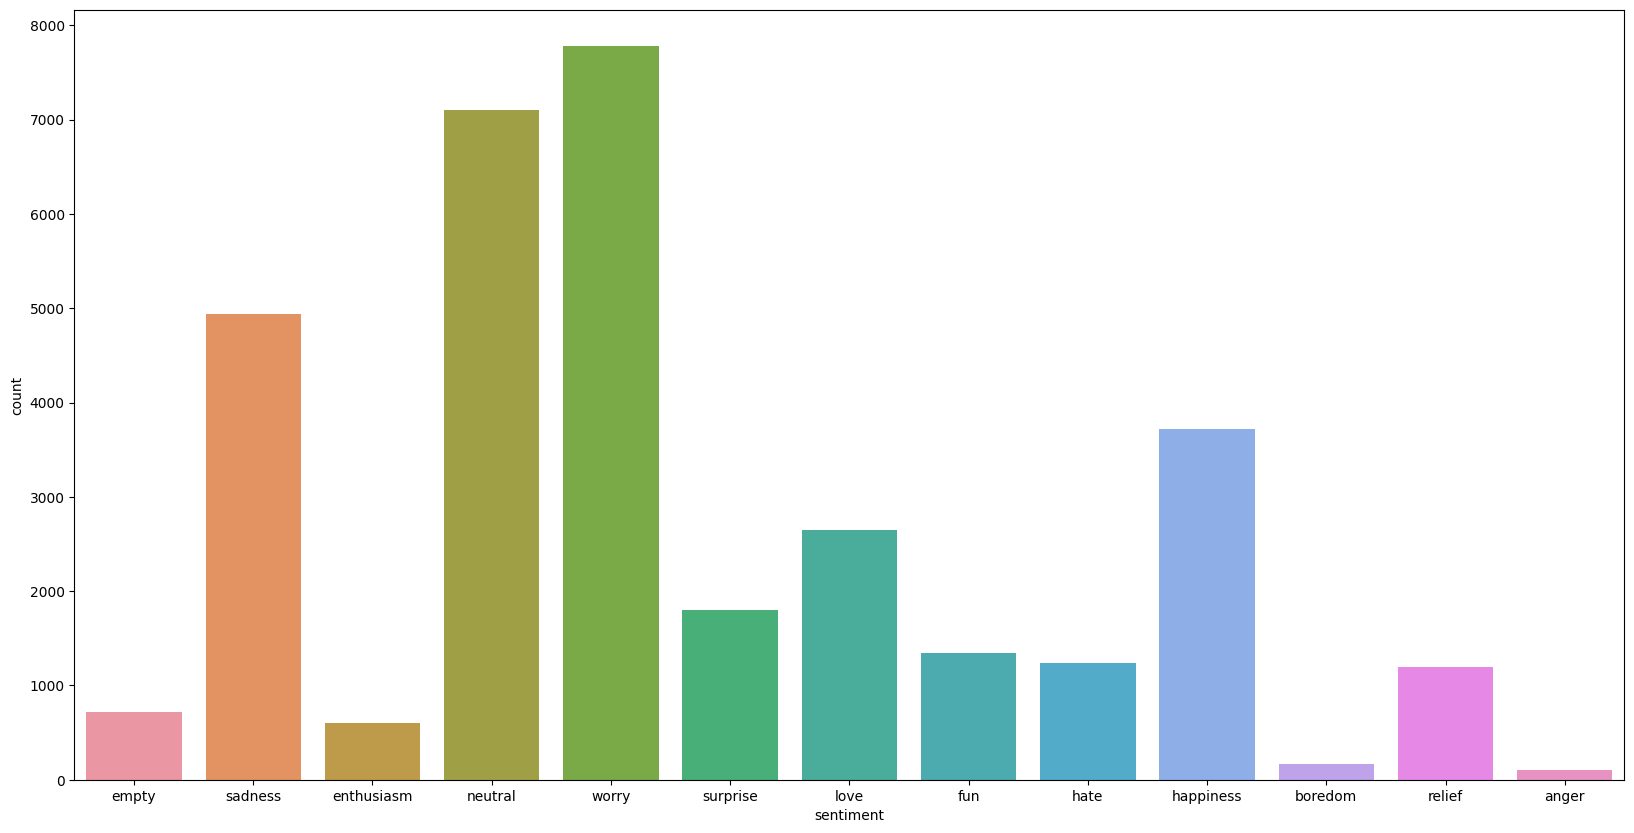

In [98]:
#new method
plt.figure(figsize=(20,10))
sns.countplot(x='sentiment',data=df)
plt.show()

In [99]:
#sentiment Analysis
from textblob import TextBlob

In [100]:
def get_sentiment(content):
  blob=TextBlob(content)
  sentiment=blob.sentiment.polarity
  if sentiment>0:
    result="Positive"
  if sentiment<0:
    result="Negative"
  else:
    result="Neutral"
  return result

In [101]:
get_sentiment("I love coding")

'Neutral'

In [102]:
df['reply']=df['content'].apply(get_sentiment)

In [103]:
df.head()

,tweet_id,sentiment,content,reply
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Neutral
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral


In [104]:
#compare our sentiment and reply
df.groupby(['sentiment','reply']).size()

sentiment   reply   
anger       Negative      33
            Neutral       69
boredom     Negative      76
            Neutral       90
empty       Negative     158
            Neutral      560
enthusiasm  Negative      89
            Neutral      509
fun         Negative     152
            Neutral     1189
happiness   Negative     269
            Neutral     3449
hate        Negative     663
            Neutral      572
love        Negative     173
            Neutral     2474
neutral     Negative    1022
            Neutral     6084
relief      Negative     176
            Neutral     1015
sadness     Negative    1832
            Neutral     3105
surprise    Negative     344
            Neutral     1453
worry       Negative    2555
            Neutral     5222
dtype: int64

<Axes: xlabel='sentiment,reply'>

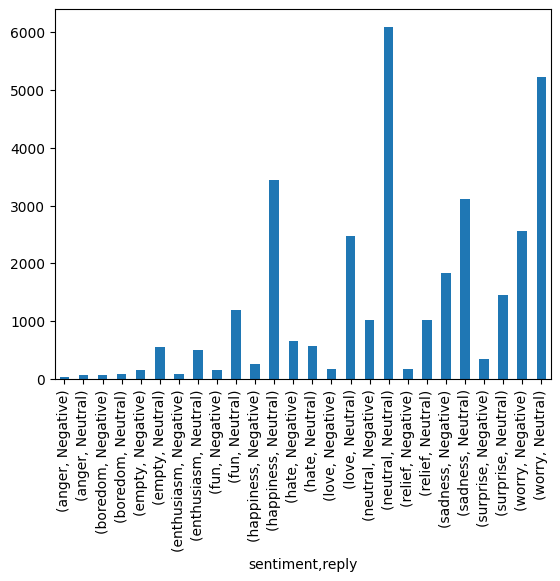

In [105]:
df.groupby(['sentiment','reply']).size().plot(kind='bar')

In [106]:
sns.catplot

<function seaborn.categorical.catplot(data=None, *, x=None, y=None, hue=None, row=None, col=None, col_wrap=None, estimator='mean', errorbar=('ci', 95), n_boot=1000, units=None, seed=None, order=None, hue_order=None, row_order=None, col_order=None, height=5, aspect=1, kind='strip', native_scale=False, formatter=None, orient=None, color=None, palette=None, hue_norm=None, legend='auto', legend_out=True, sharex=True, sharey=True, margin_titles=False, facet_kws=None, ci='deprecated', **kwargs)>

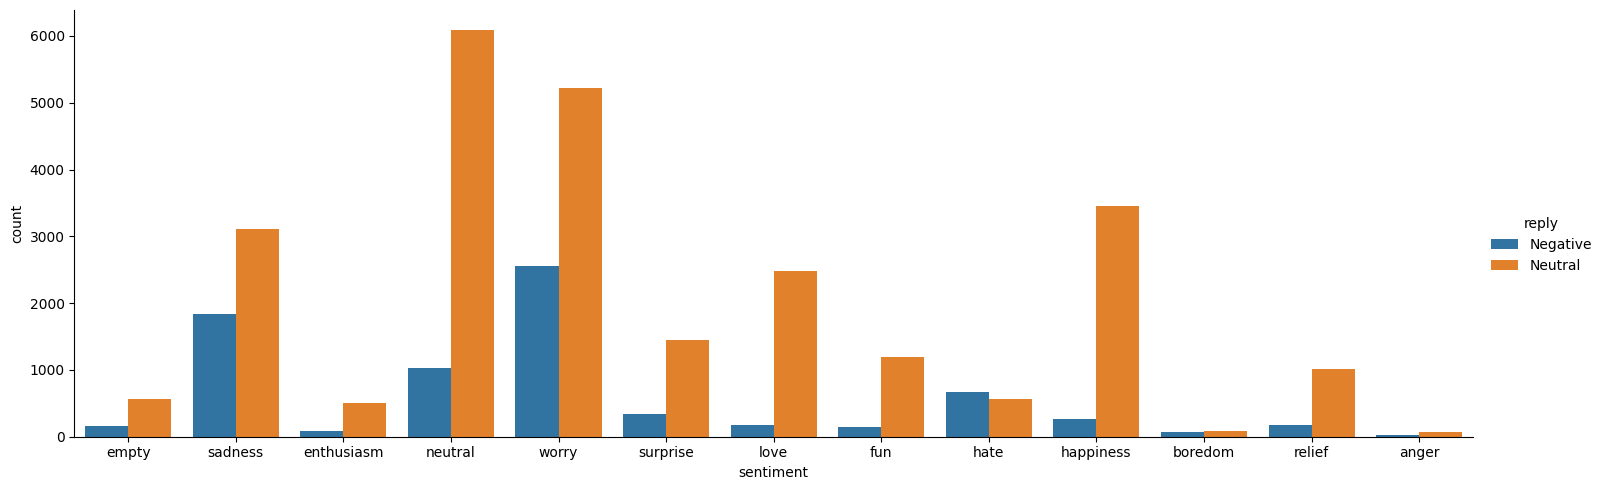

In [107]:
sns.catplot(x='sentiment',hue='reply',data=df,kind='count',aspect=3)

In [108]:
# Data Cleaning
dir(nfx)

['BTC_ADDRESS_REGEX',
 'CURRENCY_REGEX',
 'CURRENCY_SYMB_REGEX',
 'Counter',
 'DATE_REGEX',
 'EMAIL_REGEX',
 'EMOJI_REGEX',
 'HASTAG_REGEX',
 'MASTERCard_REGEX',
 'MD5_SHA_REGEX',
 'MOST_COMMON_PUNCT_REGEX',
 'NUMBERS_REGEX',
 'PHONE_REGEX',
 'PoBOX_REGEX',
 'SPECIAL_CHARACTERS_REGEX',
 'STOPWORDS',
 'STOPWORDS_de',
 'STOPWORDS_en',
 'STOPWORDS_es',
 'STOPWORDS_fr',
 'STOPWORDS_ru',
 'STOPWORDS_yo',
 'STREET_ADDRESS_REGEX',
 'TextFrame',
 'URL_PATTERN',
 'USER_HANDLES_REGEX',
 'VISACard_REGEX',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__generate_text',
 '__loader__',
 '__name__',
 '__numbers_dict',
 '__package__',
 '__spec__',
 '_lex_richness_herdan',
 '_lex_richness_maas_ttr',
 'clean_text',
 'defaultdict',
 'digit2words',
 'extract_btc_address',
 'extract_currencies',
 'extract_currency_symbols',
 'extract_dates',
 'extract_emails',
 'extract_emojis',
 'extract_hashtags',
 'extract_html_tags',
 'extract_mastercard_addr',
 'extract_md5sha',
 'extract_numbers',
 'extr

In [109]:
# User handles
df['Clean_content'] = df['content'].apply(nfx.remove_userhandles)

In [110]:
# Stopwords
df['Clean_content'] = df['Clean_content'].apply(nfx.remove_stopwords)

In [111]:
#punctuations
df['Clean_content'] = df['Clean_content'].apply(nfx.remove_punctuations)

In [112]:
df

,tweet_id,sentiment,content,reply,Clean_content
0,1956967341,empty,@tiffanylue i know i was listenin to bad habi...,Negative,know listenin bad habit earlier started freaki...
1,1956967666,sadness,Layin n bed with a headache ughhhh...waitin o...,Neutral,Layin n bed headache ughhhhwaitin call
2,1956967696,sadness,Funeral ceremony...gloomy friday...,Neutral,Funeral ceremonygloomy friday
3,1956967789,enthusiasm,wants to hang out with friends SOON!,Neutral,wants hang friends SOON
4,1956968416,neutral,@dannycastillo We want to trade with someone w...,Neutral,want trade Houston tickets will
...,...,...,...,...,...
33328,1752590004,love,I have been married 1 year to the most wonderf...,Neutral,married 1 year wonderful man
33329,1752590104,fun,@patricklanglois http://twitpic.com/4w52z - i ...,Neutral,http://twitpiccom/4w52z bet ate missed brazil...
33330,1752590262,love,@Michaelcopon: Awesome. Tell me if its good. I...,Neutral,Awesome Tell good watch
33331,1752590346,sadness,@ninjapixie83 Sorry for your loss. I know how...,Negative,Sorry loss know feel lucky cat


In [113]:
# Features & Labels
Xfeatures = df['Clean_content']
ylabels = df['sentiment']

In [114]:
#  Split Data
x_train,x_test,y_train,y_test = train_test_split(Xfeatures,ylabels,test_size=0.3,random_state=42)

In [115]:
# Build Pipeline
from sklearn.pipeline import Pipeline

In [116]:
# LogisticRegression Pipeline
pipe_lr = Pipeline(steps=[('cv',CountVectorizer()),('lr',LogisticRegression())])

In [117]:
# Train and Fit Data
pipe_lr.fit(x_train,y_train)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [118]:
pipe_lr

Pipeline(steps=[('cv', CountVectorizer()), ('lr', LogisticRegression())])

In [120]:
# Check Accuracy
pipe_lr.score(x_test,y_test)

0.3254

In [121]:
# Make A Prediction
ex1 = "This book was so interesting it made me happy"

In [122]:
pipe_lr.predict([ex1])

array(['happiness'], dtype=object)

In [123]:
# Prediction Prob
print(pipe_lr.predict_proba([ex1]))

[[0.00540493 0.00493398 0.00143539 0.09539199 0.00664774 0.21580572
  0.02935237 0.19148047 0.21372733 0.02887333 0.04689398 0.05482561
  0.10522716]]


In [124]:
# To Know the classes
print(pipe_lr.classes_)

['anger' 'boredom' 'empty' 'enthusiasm' 'fun' 'happiness' 'hate' 'love'
 'neutral' 'relief' 'sadness' 'surprise' 'worry']


In [125]:
# Save Model & Pipeline
import joblib
pipeline_file = open("emotion_classifier_pipe_lr_27_june_2023.pkl","wb")
joblib.dump(pipe_lr,pipeline_file)
pipeline_file.close()

In [126]:
ex2="Hey guys i have a problem .. i need money for the medical treatment"

In [127]:
pipe_lr.predict([ex2])

array(['worry'], dtype=object)